# **Weather Classification**

A simple weather classification task using resnet34

In [14]:
from fastai.vision.all import *

# Path to the main folder containing subfolders of pictures
path = Path('/kaggle/input/weather-dataset')

In [15]:
# Define the data block
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(224))

# Create the dataloaders
dls = dblock.dataloaders(path)

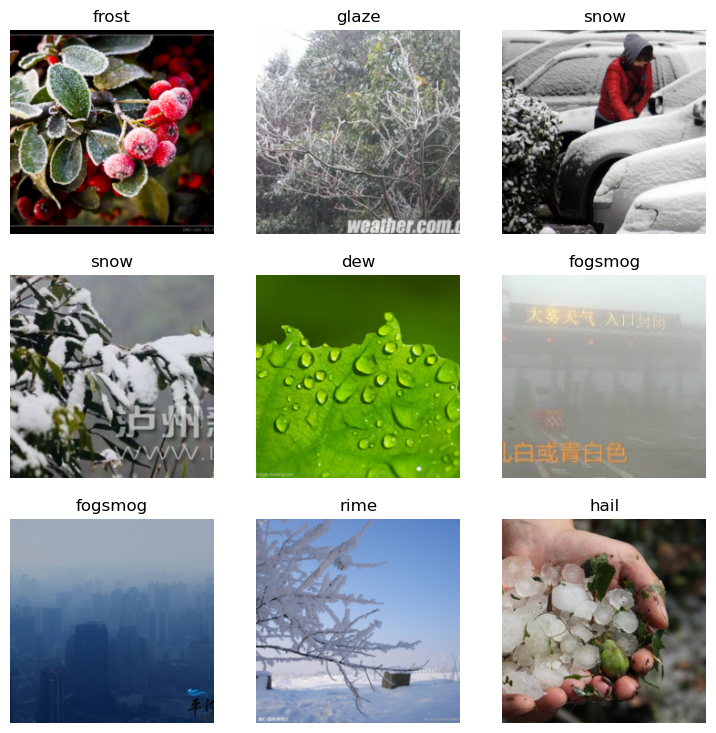

In [16]:
# Show a batch of data
dls.show_batch()

___

# Classification Task

In [17]:
# Create a learner
learn = vision_learner(dls, resnet18, metrics=error_rate)

## Model Fine-Tuning

In [18]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.303295,0.516234,0.166910,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.544449,0.414465,0.133382,00:49
1,0.376133,0.343628,0.110787,00:50
2,0.225136,0.300850,0.098397,00:49
3,0.128245,0.286974,0.096210,00:48


## Predictions

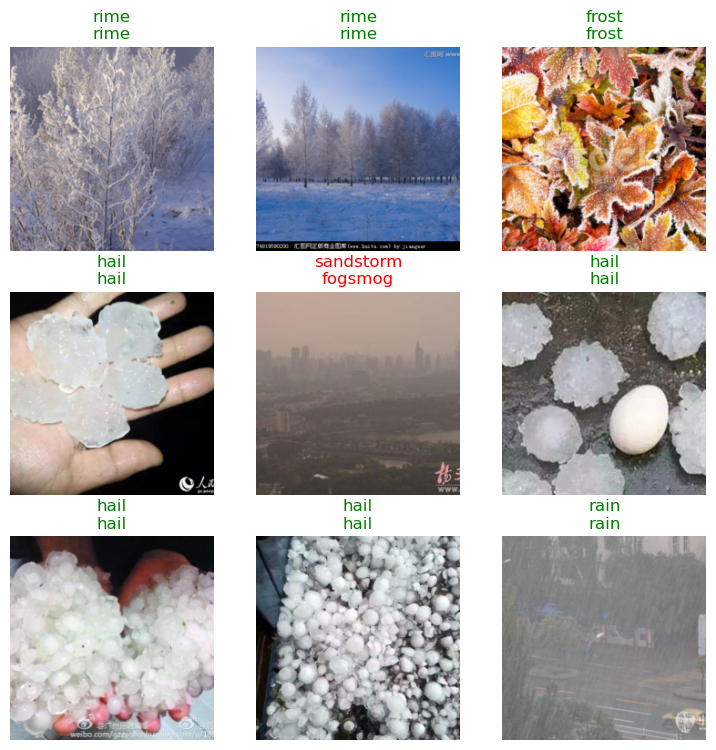

In [19]:
learn.show_results()

## Metrics

In [20]:
metrics = learn.validate()
print(metrics)

[0.2869735360145569, 0.09620991349220276]


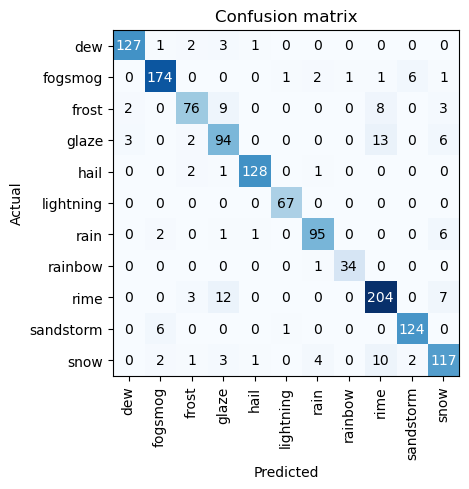

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


### Accuracy: 90.38%

___

## Saving the Model

In [25]:
learn.export('/kaggle/working/model.pkl')